# **Colab** **link**

https://colab.research.google.com/drive/1b87vumL0bpfPfDFC44oLGWqrC5OGVah-?usp=sharing

# **Read Dataset**

In [1]:
#import tools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
import statsmodels
from scipy import stats
from scipy.stats import levene
import scipy.stats
import math
import random
import statistics
import scipy.stats as sp
from sklearn import linear_model
import seaborn as sns
from scipy import stats

In [2]:
#Read the dataset 
import pandas as pd
ASdata = pd.read_csv('https://raw.githubusercontent.com/shionguha/inf2178-expdesignfordatascience-w23/main/project%20dataset/Arrests_and_Strip_Searches_(RBDC-ARR-TBL-001).csv')
ASdata.head()

Arrest_Year Arrest_Month  EventID   ArrestID  PersonID     Perceived_Race  \
0         2020    July-Sept  1005907  6017884.0    326622              White   
1         2020    July-Sept  1014562  6056669.0    326622              White   
2         2020      Oct-Dec  1029922  6057065.0    326622  Unknown or Legacy   
3         2021      Jan-Mar  1052190  6029059.0    327535              Black   
4         2021      Jan-Mar  1015512  6040372.0    327535        South Asian   

  Sex Age_group__at_arrest_ Youth_at_arrest__under_18_years ArrestLocDiv  ...  \
0   M   Aged 35 to 44 years                     Not a youth           54  ...   
1   M   Aged 35 to 44 years                     Not a youth           54  ...   
2   M   Aged 35 to 44 years                     Not a youth           54  ...   
3   M   Aged 25 to 34 years                     Not a youth           XX  ...   
4   M   Aged 25 to 34 years                     Not a youth           XX  ...   

   Actions_at_arrest___Resisted__d  Actions_at_arrest___Mental_inst  \
0                                0                                0   
1                                0                                0   
2                                0                                0   
3                                0                                0   
4                                0                                0   

  Actions_at_arrest___Assaulted_o  Actions_at_arrest___Cooperative  \
0                               0                                1   
1                               0                                0   
2                               0                                0   
3                               0                                0   
4                               0                                0   

   SearchReason_CauseInjury  SearchReason_AssistEscape  \
0                       NaN                        NaN   
1                       NaN                        NaN   
2                       NaN                        NaN   
3                       NaN                        NaN   
4                       NaN                        NaN   

   SearchReason_PossessWeapons  SearchReason_PossessEvidence  ItemsFound  \
0                          NaN                           NaN         NaN   
1                          NaN                           NaN         NaN   
2                          NaN                           NaN         NaN   
3                          NaN                           NaN         NaN   
4                          NaN                           NaN         NaN   

   ObjectId  
0         1  
1         2  
2         3  
3         4  
4         5  

[5 rows x 25 columns]

In [3]:
#View the dataset,see more information about the dataset
ASdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65276 entries, 0 to 65275
Data columns (total 25 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Arrest_Year                      65276 non-null  int64  
 1   Arrest_Month                     65276 non-null  object 
 2   EventID                          65276 non-null  int64  
 3   ArrestID                         64807 non-null  float64
 4   PersonID                         65276 non-null  int64  
 5   Perceived_Race                   65272 non-null  object 
 6   Sex                              65276 non-null  object 
 7   Age_group__at_arrest_            65252 non-null  object 
 8   Youth_at_arrest__under_18_years  65276 non-null  object 
 9   ArrestLocDiv                     65276 non-null  object 
 10  StripSearch                      65276 non-null  int64  
 11  Booked                           65276 non-null  int64  
 12  Occurrence_Categor

# **Data Cleaning**

In [4]:
#Remove nan in the dataset - "Age_group__at_arrest_" column
import pandas as pd
import numpy as np

ASdata=ASdata.dropna(subset=['Age_group__at_arrest_'])
ASdata['Age_group__at_arrest_'].unique()

#Remove nan in the dataset - "Occurrence_Category" column
import pandas as pd
import numpy as np

ASdata=ASdata.dropna(subset=['Occurrence_Category'])
ASdata['Occurrence_Category'].unique()

array(['Assault & Other crimes against persons', 'Harassment/Threatening',
       'FTA/FTC/Compliance Check/Parollee', 'Assault', 'Robbery/Theft',
       'Sexual Related Crime', 'Mischief & Fraud', 'Warrant',
       'Police Category - Administrative', 'Robbery & Theft',
       'FTA/FTC, Compliance Check & Parollee', 'Drug Related', 'Weapons',
       'Vehicle Related (inc. Impaired)', 'Other Offence',
       'Harassment & Threatening', 'Weapons & Homicide',
       'Break and Enter', 'Mischief', 'Break & Enter',
       'Sexual Related Crimes & Crimes Against Children',
       'Crimes against Children', 'Police Category - Incident', 'Fraud',
       'LLA', 'Mental Health', 'Other Statute', 'Vehicle Related',
       'Other Statute & Other Incident Type', 'Impaired', 'Homicide'],
      dtype=object)

In [5]:
# Combine same categories in "Age_group__at_arrest_" column
ASdata['Age_group__at_arrest_'] = ASdata['Age_group__at_arrest_'].replace(['Aged 17 years and under'], 'Aged 17 years and younger')
ASdata['Age_group__at_arrest_'] = ASdata['Age_group__at_arrest_'].replace(['Aged 65 and older'], 'Aged 65 years and older')

In [6]:
# Combine same categories in "Occurrence_Category" column
ASdata['Occurrence_Category'] = ASdata['Occurrence_Category'].replace(['Break and Enter'], 'Break & Enter')

In [7]:
#delete blank rows in race
ASdata = ASdata.dropna(subset=['Perceived_Race'])

In [8]:
df1=ASdata
# Group data by Perceived Race and count number of arrests in each group
arrest_counts_by_race = df1.groupby("Perceived_Race").size()
print(arrest_counts_by_race)

Perceived_Race
Black                   17487
East/Southeast Asian     4402
Indigenous               1926
Latino                   1759
Middle-Eastern           3227
South Asian              3603
Unknown or Legacy        5044
White                   27635
dtype: int64


In [9]:
# remove any rows has a value of 'U' in Sex
ASdata.drop(ASdata[ASdata['Sex'] == 'U'].index, inplace = True)
ASdata['Sex']. value_counts()

<ipython-input-9-acbc0f494847>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ASdata.drop(ASdata[ASdata['Sex'] == 'U'].index, inplace = True)


M    52499
F    12575
Name: Sex, dtype: int64

In [10]:
#remove rows without arrested ID 
ASdata = ASdata[ASdata['ArrestID'].notnull()]

In [11]:
# Count the number of arrests by each person, and create the new column "Number_Arrest"
df1 = ASdata
Number_Arrest = df1.groupby("PersonID").size()
df1["Number_Arrest"] = df1["PersonID"].map(Number_Arrest)

<ipython-input-11-c6ccac2cce89>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["Number_Arrest"] = df1["PersonID"].map(Number_Arrest)


In [12]:
# Count the number of strip search by each person, and create the new column "Number_StripSearch"
Number_StripSearch= df1.groupby("PersonID")["StripSearch"].sum()
df1["Number_StripSearch"] = df1["PersonID"].map(Number_StripSearch)

In [13]:
#drop repeated value
df1 = df1.drop_duplicates(subset="PersonID", keep="first")
#see table now 
print(df1['Number_Arrest'].value_counts())

1     26787
2      5253
3      2073
4      1019
5       625
6       410
7       268
8       188
9       132
10      110
11       62
12       58
13       49
14       41
15       28
17       21
20       18
16       18
21       15
18        9
23        7
26        6
22        6
25        5
28        4
31        3
19        3
24        3
32        2
30        2
35        1
27        1
46        1
39        1
41        1
54        1
Name: Number_Arrest, dtype: int64


In [14]:
print(df1['Number_StripSearch'].value_counts())

0     32238
1      3725
2       766
3       259
4       111
5        62
6        23
7        19
8        10
10        6
9         5
11        3
12        2
17        1
13        1
Name: Number_StripSearch, dtype: int64


In [15]:
print(df1)

       Arrest_Year Arrest_Month  EventID   ArrestID  PersonID  \
0             2020    July-Sept  1005907  6017884.0    326622   
3             2021      Jan-Mar  1052190  6029059.0    327535   
6             2021      Jan-Mar  1035445  6053833.0    330778   
13            2021      Oct-Dec  1022468  6047871.0    328630   
14            2020     Apr-June  1045382  6057058.0    312724   
...            ...          ...      ...        ...       ...   
65271         2021      Oct-Dec  1055609  6044336.0    316123   
65272         2021      Oct-Dec  1032758  6031692.0    307736   
65273         2021      Oct-Dec  1021067  6064396.0    324057   
65274         2021      Oct-Dec  1008998  6008662.0    331870   
65275         2021      Oct-Dec  1033395  6032145.0    310583   

          Perceived_Race Sex      Age_group__at_arrest_  \
0                  White   M        Aged 35 to 44 years   
3                  Black   M        Aged 25 to 34 years   
6                  Black   M        Aged 2

# **EDA**

### **Descriptive**

In [16]:
#see total counts of interested columns 
sex_counts = ASdata['Sex'].value_counts()
print(sex_counts)

M    52106
F    12500
Name: Sex, dtype: int64


In [17]:
race_counts = ASdata['Perceived_Race'].value_counts()
print(race_counts)

White                   27402
Black                   17352
Unknown or Legacy        4999
East/Southeast Asian     4388
South Asian              3594
Middle-Eastern           3213
Indigenous               1907
Latino                   1751
Name: Perceived_Race, dtype: int64


In [18]:
strip_counts = ASdata['StripSearch'].value_counts()
print(strip_counts)

0    57275
1     7331
Name: StripSearch, dtype: int64


In [19]:
location_counts = ASdata["ArrestLocDiv"].value_counts()
print(location_counts)

XX    29014
51     5023
14     3114
41     2640
43     2605
52     2337
31     2263
32     2084
12     1902
22     1844
42     1842
11     1788
23     1736
55     1552
54     1436
53     1374
13     1100
33      952
Name: ArrestLocDiv, dtype: int64


In [20]:
Occurrence_counts = ASdata["Occurrence_Category"].value_counts()
print(Occurrence_counts)

Assault                                            7724
Assault & Other crimes against persons             7178
Robbery & Theft                                    4490
Warrant                                            4359
FTA/FTC/Compliance Check/Parollee                  4240
Police Category - Administrative                   3885
FTA/FTC, Compliance Check & Parollee               3748
Robbery/Theft                                      3747
Drug Related                                       2733
Other Statute & Other Incident Type                2334
Vehicle Related (inc. Impaired)                    1977
Other Offence                                      1960
Break & Enter                                      1715
Mischief & Fraud                                   1712
Impaired                                           1362
Harassment/Threatening                             1344
Mischief                                           1320
Harassment & Threatening                        

### **Line graph**

In [21]:
from re import X
import plotly.express as px
#See trends in totoal amount of strip searches in different arrent location
px.line(ASdata[ASdata['StripSearch'] == 1].groupby("ArrestLocDiv").count(), 
       y = "StripSearch",
       title="Total Amount of Strip Searches in Arrest Location",
       labels={"index": "Perceived Race"})

In [22]:
#See trends in totoal amount of strip searches in Occurrence_Category
px.line(ASdata[ASdata['StripSearch'] == 1].groupby("Occurrence_Category").count(), 
       y = "StripSearch",
       title="Total Amount of Strip Searches in Occurrence_Category",
       labels={"index": "Perceived Race"})

### **Barplot**

In [23]:
from re import X
import plotly.express as px
#See differences in totoal amount of strip searches in Perceived Race
px.bar(ASdata[ASdata['StripSearch'] == 1].groupby(ASdata.Perceived_Race).count(), 
       y = "StripSearch",
       title="Total Amount of Strip Searches in Perceived Race",
       labels={"index": "Perceived Race"})

In [24]:
#See differences in total amount of strip searches in Age groups at arrest
px.bar(ASdata[ASdata['StripSearch'] == 1].groupby(ASdata.Age_group__at_arrest_).count(), 
       y = "StripSearch",
       title="Total Amount of Strip Searches in Age Group at Arrest",
       labels={"index": "Age Group at Arrest"})

In [25]:
px.bar(ASdata[ASdata['Perceived_Race'] == "Black"].groupby(ASdata.Age_group__at_arrest_).count(), 
       y = "Perceived_Race",
       title="Total Amount of Black People in Diffent Age Group at Arrest",
       labels={"index": "Age Group at Arrest"})


### **Histogram**

In [26]:
#See differences in total amount of strip searches in Perceived Race with different Age groups at arrest 
plot1 = ASdata[ASdata['StripSearch'] == 1]
px.histogram(plot1, 
             x = "Perceived_Race", 
             y = "StripSearch", 
             color="Age_group__at_arrest_",
             title="Total Amount of Strip Searches in Perceived Race With Different Age Groups At Arrest",
             labels={"Age_group__at_arrest_": "Age Group at Arrest", "Perceived_Race": "Perceived Race"})

In [27]:
#See differences in total amount of strip searches in Perceived Race with different sex 
plot2 = ASdata[ASdata['StripSearch'] == 1]
px.histogram(plot2, 
             x = "Perceived_Race", 
             y = "StripSearch", 
             color="Sex",
             title="Total Amount of Strip Searches in Perceived Race With Different Sex",
             labels={"Perceived_Race": "Perceived Race"})

In [28]:
#See differences in totoal amount of Booked in Perceived Race
px.bar(ASdata[ASdata['Booked'] == 1].groupby(ASdata.Perceived_Race).count(), 
       y = "Booked",
       title="Total Amount of Booked in Perceived Race",
       labels={"index": "Perceived Race"})

In [29]:
#See differences in total amount of Booked in Age groups at arrest
px.bar(ASdata[ASdata['Booked'] == 1].groupby(ASdata.Age_group__at_arrest_).count(), 
       y = "Booked",
       title="Total Amount of Booked in Age Group at Arrest",
       labels={"index": "Age Group at Arrest"})

In [30]:
#See differences in total amount of booked in Perceived Race with different Sex 
plot3 = ASdata[ASdata['Booked'] == 1]
px.histogram(plot3, 
             x = "Perceived_Race", 
             y = "Booked", 
             color="Sex",
             title="Total Amount of Booked in Perceived Race With Different Sex",
             labels={"Perceived_Race": "Perceived Race"})

In [31]:
#See differences in total amount of booked in Perceived Race with different Age groups at arrest 
plot4 = ASdata[ASdata['Booked'] == 1]
px.histogram(plot4, 
             x = "Perceived_Race", 
             y = "Booked", 
             color="Age_group__at_arrest_",
             title="Total Amount of Booked in Perceived Race With Different Age Groups At Arrest",
             labels={"Age_group__at_arrest_": "Age Group at Arrest","Perceived_Race": "Perceived Race"})

In [32]:
#See differences in total amount of Booked in Age groups at arrest
px.bar(ASdata[ASdata['StripSearch'] == 1].groupby(ASdata.Occurrence_Category).count(), 
       y = "StripSearch",
       title="Total Amount of Strip Searches in Various Occurence Catrgories",
       labels={"index": "Occurrence Category"})

In [33]:
#See differences in total amount of strip searches in Perceived Race with different occurence categories 
plot5 = ASdata[ASdata['StripSearch'] == 1]
px.histogram(plot5, 
             x = "Perceived_Race", 
             y = "StripSearch", 
             color="Occurrence_Category",
             title="Total Amount of Strip Search in Perceived Race With Different Occurence category",
             labels={"Perceived_Race": "Perceived Race"})

In [34]:
#See differences in total amount of Booked in Perceived Race with different occurence categories 
plot5 = ASdata[ASdata['Booked'] == 1]
px.histogram(plot5, 
             x = "Perceived_Race", 
             y = "Booked", 
             color="Occurrence_Category",
             title="Total Amount of Strip Search in Perceived Race With Different Occurence category",
             labels={"Perceived_Race": "Perceived Race"})

### **Small Multiples**

In [35]:
#See difference actions at arrest 
import plotly.graph_objects as go
from plotly.subplots import make_subplots

d = {'Concealed': ASdata["Actions_at_arrest___Concealed_i"],
     'Combative': ASdata['Actions_at_arrest___Combative__'],
     'Resisted': ASdata['Actions_at_arrest___Resisted__d'],
     'Mental insanity': ASdata['Actions_at_arrest___Mental_inst'],
     'Assulted': ASdata['Actions_at_arrest___Assaulted_o'],
     'Cooperative': ASdata['Actions_at_arrest___Cooperative']}

df = pd.DataFrame(d)
fig = make_subplots(rows=1, cols=6, subplot_titles=('Concealed', 'Combative', 'Resisted', 'Mental insanity','Assaulted', 'Cooperative'))
L= len(df)
cnames = list(df.columns)
for k, name in enumerate(cnames):
    n_true = df[name].sum()
    fig.add_trace(go.Bar(x=['Yes', 'No'], y=[n_true, L-n_true], name=name ), 1,k+1)
fig.update_layout(barmode='relative',  bargap=0.05, width=1500, height=400, title = "Different Actions At Arrest",)



In [36]:
#Replace nan in each column into 0
ASdata['SearchReason_CauseInjury'] = ASdata['SearchReason_CauseInjury'].fillna(0)
ASdata['SearchReason_AssistEscape'] = ASdata['SearchReason_AssistEscape'].fillna(0)
ASdata['SearchReason_PossessWeapons'] = ASdata['SearchReason_PossessWeapons'].fillna(0)
ASdata['SearchReason_PossessEvidence'] = ASdata['SearchReason_PossessEvidence'].fillna(0)

In [37]:
#See difference Search Reason 
import plotly.graph_objects as go
from plotly.subplots import make_subplots

d = {'Cause Injury': ASdata["SearchReason_CauseInjury"],
     'Assist Escape': ASdata['SearchReason_AssistEscape'],
     'Possess Weapons': ASdata['SearchReason_PossessWeapons'],
     'Possess Evidence': ASdata['SearchReason_PossessEvidence']}

df = pd.DataFrame(d)
fig = make_subplots(rows=1, cols=6, subplot_titles=('Cause Injury', 'Assist Escape', 'Possess Weapons', 'Possess Evidence'))
L= len(df)
cnames = list(df.columns)
for k, name in enumerate(cnames):
    n_true = df[name].sum()
    fig.add_trace(go.Bar(x=['Yes', 'No'], y=[n_true, L-n_true], name=name ), 1,k+1)
fig.update_layout(barmode='relative',  bargap=0.05, width=1500, height=400, title = "Different Search Reasons",)

### **Violin Plot**

In [38]:
import plotly.express as px

fig = px.violin(df1, y="Number_StripSearch", x="Perceived_Race", color="Sex",box=True)
fig.show()

In [39]:
fig = px.violin(df1, y="Number_Arrest", x="Perceived_Race", color="Sex", box=True)
fig.show()

### **BoxPlot**

In [40]:
fig = px.box(df1, x="Occurrence_Category", y="Number_Arrest",color="Perceived_Race")
fig.show()

In [41]:
fig = px.box(df1, x="Occurrence_Category", y="Number_StripSearch",color="Perceived_Race")
fig.update_layout(width=1700)
fig.show()

# **Power Analysis**

In [42]:
#code for Cohen's D 

#function to calculate the pooled standard deviation of 2 samples
def pooled_standard_deviation(sample1,sample2):
    #calculate the sample size
    n1, n2 = len(sample1), len(sample2)
    #calculate the variances
    var1, var2 = np.var(sample1, ddof=1), np.var(sample2, ddof=1)
    #calculate the pooled standard deviation
    numerator = ((n1-1) * var1) + ((n2-1) * var2)
    denominator = n1+n2-2
    return np.sqrt(numerator/denominator)

# function to calculate Cohen's d for independent samples
def Cohens_d(sample1, sample2):
    u1, u2 = np.mean(sample1), np.mean(sample2)
    s_pooled = pooled_standard_deviation(sample1, sample2)
    #print(s_pooled)
    return ((u1 - u2) / s_pooled)

###**Power Analysis Perceived Race - Black VS White**

In [43]:
BL_df = df1[df1['Perceived_Race']=='Black']
W_df = df1[df1['Perceived_Race']=='White']

BL_ss = BL_df['Number_StripSearch']
W_ss = W_df['Number_StripSearch']

In [44]:
#conduct power analysis 
from statsmodels.stats.power import TTestIndPower
effect_size = Cohens_d(W_ss,BL_ss)
alpha = 0.05
power = 0.8
ratio_ =len(W_ss)/len(BL_ss) #NB: ratio = nobs2/nobs1
print('Effect size (Cohen\'s D) for StripSearch:',effect_size)

Effect size (Cohen's D) for StripSearch: 0.0012072019455060734


In [45]:
#https://www.statsmodels.org/dev/generated/statsmodels.stats.power.TTestIndPower.solve_power.html
analysis = TTestIndPower()
sample_size = analysis.solve_power(effect_size, power=power, nobs1=None, ratio=ratio_, alpha=alpha)
print('Sample Size of nobs1: %.3f' % sample_size, 'needed for BL_ss') 
print('Actual size of BL_ss:', len(BL_ss))
nobs2 =ratio_*sample_size
print('Sample Size of nobs2: %.3f' % nobs2, 'needed for W_ss')
print('Actual size of W_ss:', len(W_ss))

Sample Size of nobs1: 9075178.243 needed for BL_ss
Actual size of BL_ss: 9909
Sample Size of nobs2: 13247800.312 needed for W_ss
Actual size of W_ss: 14465


In [46]:
#another way to go about this is the other direction. We can test the power of a proposed sample size 

from statsmodels.stats.power import TTestPower

power = TTestPower()
n_test = power.solve_power(nobs=9909, effect_size = 0.8, power = None, alpha = 0.05)
print('Power: {:.3f}'.format(n_test))

Power: 1.000


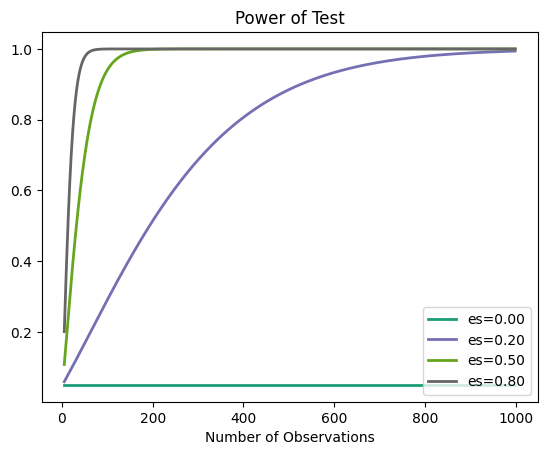

In [47]:
#lastly power curve

effect_sizes = np.array([0.0012072019455060734,0.2, 0.5, 0.8])
sample_sizes = np.array(range(5, 1000))
  
# plot power curves
analysis.plot_power(dep_var='nobs', nobs=sample_sizes,
               effect_size=effect_sizes)
  
plt.show()

###**Power Analysis Perceived Race - Black VS East/Southeast Asian**

In [48]:
BL_df = df1[df1['Perceived_Race']=='Black']
ES_df = df1[df1['Perceived_Race']=='East/Southeast Asian']

BL_ss = BL_df['Number_StripSearch']
ES_ss = ES_df['Number_StripSearch']

In [49]:
#conduct power analysis 
from statsmodels.stats.power import TTestIndPower
effect_size = Cohens_d(ES_ss,BL_ss)
alpha = 0.05
power = 0.8
ratio_ =len(ES_ss)/len(BL_ss) #NB: ratio = nobs2/nobs1
print('Effect size (Cohen\'s D) for StripSearch:',effect_size)

Effect size (Cohen's D) for StripSearch: -0.2147784226845171


In [50]:
#https://www.statsmodels.org/dev/generated/statsmodels.stats.power.TTestIndPower.solve_power.html
analysis = TTestIndPower()
sample_size = analysis.solve_power(effect_size, power=power, nobs1=None, ratio=ratio_, alpha=alpha)
print('Sample Size of nobs1: %.3f' % sample_size, 'needed for BL_ss') 
print('Actual size of BL_ss:', len(BL_ss))
nobs2 =ratio_*sample_size
print('Sample Size of nobs2: %.3f' % nobs2, 'needed for ES_ss')
print('Actual size of ES_ss:', len(ES_ss))

Sample Size of nobs1: 716.360 needed for BL_ss
Actual size of BL_ss: 9909
Sample Size of nobs2: 223.750 needed for ES_ss
Actual size of ES_ss: 3095


In [51]:
#another way to go about this is the other direction. We can test the power of a proposed sample size 

from statsmodels.stats.power import TTestPower

power = TTestPower()
n_test = power.solve_power(nobs=9909, effect_size = 0.8, power = None, alpha = 0.05)
print('Power: {:.3f}'.format(n_test))

Power: 1.000


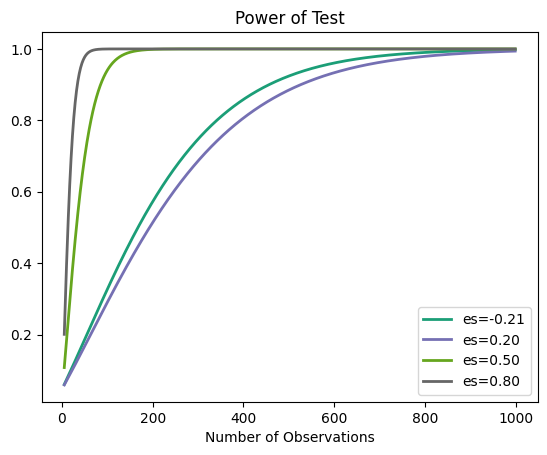

In [52]:
#lastly power curve

effect_sizes = np.array([-0.2147784226845171,0.2, 0.5, 0.8])
sample_sizes = np.array(range(5, 1000))
  
# plot power curves
analysis.plot_power(dep_var='nobs', nobs=sample_sizes,
               effect_size=effect_sizes)
  
plt.show()

###**Power Analysis Sex - Male VS Female**

In [53]:
F_df = df1[df1['Sex']=='F']
M_df = df1[df1['Sex']=='M']

F_ss = F_df['Number_StripSearch']
M_ss = M_df['Number_StripSearch']

In [54]:
#conduct power analysis 
from statsmodels.stats.power import TTestIndPower
effect_size = Cohens_d(M_ss,F_ss)
alpha = 0.05
power = 0.8
ratio_ =len(M_ss)/len(F_ss) #NB: ratio = nobs2/nobs1
print('Effect size (Cohen\'s D) for StripSearch:',effect_size)

Effect size (Cohen's D) for StripSearch: 0.07640487121055602


In [55]:
#https://www.statsmodels.org/dev/generated/statsmodels.stats.power.TTestIndPower.solve_power.html
analysis = TTestIndPower()
sample_size = analysis.solve_power(effect_size, power=power, nobs1=None, ratio=ratio_, alpha=alpha)
print('Sample Size of nobs1: %.3f' % sample_size, 'needed for F_ss') 
print('Actual size of F_ss:', len(F_ss))
nobs2 =ratio_*sample_size
print('Sample Size of nobs2: %.3f' % nobs2, 'needed for M_ss')
print('Actual size of M_ss:', len(M_ss))

Sample Size of nobs1: 1692.384 needed for F_ss
Actual size of F_ss: 7646
Sample Size of nobs2: 6548.415 needed for M_ss
Actual size of M_ss: 29585


In [56]:
#another way to go about this is the other direction. We can test the power of a proposed sample size 

from statsmodels.stats.power import TTestPower

power = TTestPower()
n_test = power.solve_power(nobs=7646, effect_size = 0.8, power = None, alpha = 0.05)
print('Power: {:.3f}'.format(n_test))

Power: 1.000


/usr/local/lib/python3.9/dist-packages/scipy/stats/_continuous_distns.py:6832: RuntimeWarning:

invalid value encountered in _nct_sf

/usr/local/lib/python3.9/dist-packages/scipy/stats/_continuous_distns.py:6826: RuntimeWarning:

invalid value encountered in _nct_cdf



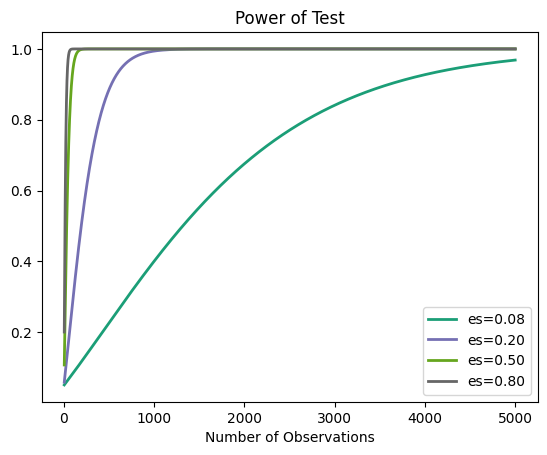

In [57]:
#lastly power curve

effect_sizes = np.array([0.07640487121055602,0.2, 0.5, 0.8])
sample_sizes = np.array(range(5, 5000))
  
# plot power curves
analysis.plot_power(dep_var='nobs', nobs=sample_sizes,
               effect_size=effect_sizes)
  
plt.show()

# **New T-Test - Final**

## **T-test - Number of Strip search & Perceived Race (Black vs, White)**

In [58]:
#degrees of freedom code for Welch test 
def welch_dof(x, y): 
    '''
    Takes in strip search for binary features
    Returns degrees of freedom 
    '''
    dof = (x.var()/x.size + y.var()/y.size)**2 / ((x.var()/x.size)**2 / (x.size-1) + (y.var()/y.size)**2 / (y.size-1))
    return dof

In [59]:
ASdata['Perceived_Race'].unique()

array(['White', 'Unknown or Legacy', 'Black', 'South Asian', 'Indigenous',
       'Middle-Eastern', 'Latino', 'East/Southeast Asian'], dtype=object)

In [60]:
##Conduct Number of strip search t-test (Black, White)##

#create black and white groups from dataset 
black = ASdata[ASdata['Perceived_Race'] == "Black"]
white = ASdata[ASdata['Perceived_Race'] == "White"]

Number_StripSearch_black = black["Number_StripSearch"]
Number_StripSearch_white = white["Number_StripSearch"]
#Null hypothesis: the mean of number of strip search for black and the mean of number of strip search for white are not different
#ALternative hypothesis: the mean of number of strip search for black and the mean of number of strip search for white are different
#conduct ttest
print('Ttest results for Number of StripSearch:',stats.ttest_ind(Number_StripSearch_white, Number_StripSearch_black, equal_var=False)) #p value is significant

Ttest results for Number of StripSearch: Ttest_indResult(statistic=2.7307830615009934, pvalue=0.006321576386601609)


In [61]:
#calculate mean and standard deviation of groups 
#Black show higher mean average score 
print('Mean Grades for Number of StripSearch, Black, White:',Number_StripSearch_white.mean(), Number_StripSearch_black.mean())
print('Standard deviation for Number of StripSearch, Black, White:',Number_StripSearch_white.std(), Number_StripSearch_black.std())

Mean Grades for Number of StripSearch, Black, White: 0.7637763666885629 0.7214153988012909
Standard deviation for Number of StripSearch, Black, White: 1.5266440674694435 1.6430558162449205


In [62]:
#Compute confidence interval 
import statsmodels.stats.api as sms
cm = sms.CompareMeans(sms.DescrStatsW(Number_StripSearch_white), sms.DescrStatsW(Number_StripSearch_black))
print('Confidence interval for Number of StripSearch:',cm.tconfint_diff(usevar='unequal'))

Confidence interval for Number of StripSearch: (0.011956190630020368, 0.07276574514452352)


In [63]:
#welch dof 
print('DOF for number of strip search:',welch_dof(Number_StripSearch_white, Number_StripSearch_black))

DOF for number of strip search: 34902.462362777645


## **T-test - Number of Strip search & Sex of Black**

In [64]:
##Conduct number of strip search t-test (Black_F, Black_M)##

#create black_F and black_M groups from dataset 
black = ASdata[ASdata['Perceived_Race'] == "Black"]
black_F = black[black["Sex"] == "F"]
black_M = black[black["Sex"] == "M"]

Number_StripSearch_black_F = black_F["Number_StripSearch"]
Number_StripSearch_black_M = black_M["Number_StripSearch"]

#Null hypothesis: the mean of Number of strip search for black female and the mean of Number of strip search for black male are not different
#ALternative hypothesis: the mean of Number of strip search for black female and the mean of Number of strip search for black male are different
#conduct ttest
print('Ttest results for Number of StripSearch:',stats.ttest_ind(Number_StripSearch_black_M, Number_StripSearch_black_F, equal_var=False)) #p value is not significant

Ttest results for Number of StripSearch: Ttest_indResult(statistic=10.819868175802178, pvalue=5.088763342704695e-27)


In [65]:
#calculate mean and standard deviation of groups 
#Black Male show higher mean average score 
print('Mean Grades for Number of StripSearch, Black Female, Black Male:',Number_StripSearch_black_F.mean(), Number_StripSearch_black_M.mean())
print('Standard deviation for Number of StripSearch, Black Female, Black Male:',Number_StripSearch_black_F.std(), Number_StripSearch_black_M.std())

Mean Grades for Number of StripSearch, Black Female, Black Male: 0.4817786693413574 0.7713251166353318
Standard deviation for Number of StripSearch, Black Female, Black Male: 1.2377502702881396 1.7112814205996583


In [66]:
#Compute confidence interval 
import statsmodels.stats.api as sms
cm = sms.CompareMeans(sms.DescrStatsW(Number_StripSearch_black_M), sms.DescrStatsW(Number_StripSearch_black_F))
print('Confidence interval for Number of StripSearch:',cm.tconfint_diff(usevar='unequal'))

Confidence interval for Number of StripSearch: (0.23708536116432827, 0.3420075334236205)


In [67]:
#welch dof 
print('DOF for number of strip search:',welch_dof(Number_StripSearch_black_M, Number_StripSearch_black_F))

DOF for number of strip search: 5657.909832046644


## **T-test - Number of Strip Search at arrest & Weapons & Homicide Occurrence in Black and White**

In [68]:
ASdata["Occurrence_Category"].unique()

array(['Assault & Other crimes against persons', 'Harassment/Threatening',
       'FTA/FTC/Compliance Check/Parollee', 'Assault', 'Robbery/Theft',
       'Sexual Related Crime', 'Mischief & Fraud', 'Warrant',
       'Police Category - Administrative',
       'FTA/FTC, Compliance Check & Parollee', 'Drug Related', 'Weapons',
       'Vehicle Related (inc. Impaired)', 'Other Offence',
       'Harassment & Threatening', 'Weapons & Homicide',
       'Robbery & Theft', 'Break & Enter', 'Mischief',
       'Sexual Related Crimes & Crimes Against Children',
       'Crimes against Children', 'Police Category - Incident', 'Fraud',
       'LLA', 'Mental Health', 'Other Statute', 'Vehicle Related',
       'Other Statute & Other Incident Type', 'Impaired', 'Homicide'],
      dtype=object)

In [69]:
##Conduct number of strip search t-test (Black_H, White_H)##

#create black_H and white_H groups from dataset 
black = ASdata[ASdata['Perceived_Race'] == "Black"]
white = ASdata[ASdata['Perceived_Race'] == "White"]

black_H = black[black["Occurrence_Category"] == "Weapons & Homicide"]
white_H = white[white["Occurrence_Category"] == "Weapons & Homicide"]

Number_StripSearch_black_H = black_H["Number_StripSearch"]
Number_StripSearch_white_H = white_H["Number_StripSearch"]

#Null hypothesis: the mean of number of strip search for Weapons & Homicide occurence of black and the mean of number of strip search for Weapons & Homicide occurence of white are not different
#ALternative hypothesis: the mean of number of strip search for Weapons & Homicide occurence of black and the mean of number of strip search for Weapons & Homicide occurence of white are different
print('Ttest results for StripSearch:',stats.ttest_ind(Number_StripSearch_white_H, Number_StripSearch_black_H, equal_var=False)) #p value is not significant

Ttest results for StripSearch: Ttest_indResult(statistic=0.9337841468290811, pvalue=0.3508417047505721)


In [70]:
#calculate mean and standard deviation of groups 
#Weapons & Homicide Occurence of White show higher mean average score 
print('Mean Grades for Number of StripSearch, Weapons & Homicide Occurence of Black, Weapons & Homicide Occurence of White:',Number_StripSearch_black_H.mean(), Number_StripSearch_white_H.mean())
print('Standard deviation for Number of StripSearch, Weapons & Homicide Occurence of Black, Weapons & Homicide Occurence of White:',Number_StripSearch_black_H.std(), Number_StripSearch_white_H.std())

Mean Grades for Number of StripSearch, Weapons & Homicide Occurence of Black, Weapons & Homicide Occurence of White: 0.8008130081300813 0.8984126984126984
Standard deviation for Number of StripSearch, Weapons & Homicide Occurence of Black, Weapons & Homicide Occurence of White: 1.1755136458423632 1.5989140486186502


In [71]:
#Compute confidence interval 
import statsmodels.stats.api as sms
cm = sms.CompareMeans(sms.DescrStatsW(Number_StripSearch_black_H), sms.DescrStatsW(Number_StripSearch_white_H))
print('Confidence interval for Number of StripSearch:',cm.tconfint_diff(usevar='unequal'))

Confidence interval for Number of StripSearch: (-0.3029265820312859, 0.10772720146605158)


In [72]:
#welch dof 
print('DOF for number of strip search:',welch_dof(Number_StripSearch_black_H, Number_StripSearch_white_H))

DOF for number of strip search: 528.4566088418311


## **T-test - Number of Strip Search at arrest & Drug Related Occurrence in Black and White**

In [73]:
##Conduct number of strip search t-test (Black_D, White_D)##

#create black_D and white_D groups from dataset 
black = ASdata[ASdata['Perceived_Race'] == "Black"]
white = ASdata[ASdata['Perceived_Race'] == "White"]

black_D = black[black["Occurrence_Category"] == "Drug Related"]
white_D = white[white["Occurrence_Category"] == "Drug Related"]

Number_StripSearch_black_D = black_D["Number_StripSearch"]
Number_StripSearch_white_D = white_D["Number_StripSearch"]

#Null hypothesis: the mean of number of strip search for Drug Related occurence of black and the mean of number of strip search for Drug Related occurence of white are not different
#ALternative hypothesis: the mean of number of strip search for Drug Related occurence of black and the mean of number of strip search for Drug Related occurence of white are different
print('Ttest results for Number of StripSearch:',stats.ttest_ind(Number_StripSearch_white_D, Number_StripSearch_black_D, equal_var=False)) #p value is not significant

Ttest results for Number of StripSearch: Ttest_indResult(statistic=1.4840551910959856, pvalue=0.13795562535731254)


In [74]:
#calculate mean and standard deviation of groups 
#Drug related Occurence of White show higher mean average score 
print('Mean Grades for Number of StripSearch, Drug Related Occurence of Black, Drug Related Occurence of White:',Number_StripSearch_black_D.mean(), Number_StripSearch_white_D.mean())
print('Standard deviation for Number of StripSearch, Drug Related Occurence of Black, Drug Related Occurence of White:',Number_StripSearch_black_D.std(), Number_StripSearch_white_D.std())

Mean Grades for Number of StripSearch, Drug Related Occurence of Black, Drug Related Occurence of White: 0.8991507430997877 0.9925650557620818
Standard deviation for Number of StripSearch, Drug Related Occurence of Black, Drug Related Occurence of White: 1.4407974385275928 1.3755136107789807


In [75]:
#Compute confidence interval 
import statsmodels.stats.api as sms
cm = sms.CompareMeans(sms.DescrStatsW(Number_StripSearch_black_D), sms.DescrStatsW(Number_StripSearch_white_D))
print('Confidence interval for Number of StripSearch:',cm.tconfint_diff(usevar='unequal'))

Confidence interval for Number of StripSearch: (-0.21686134720434724, 0.030032721879759153)


In [76]:
#welch dof 
print('DOF for number of strip search:',welch_dof(Number_StripSearch_black_D, Number_StripSearch_white_D))

DOF for number of strip search: 1953.2361212304372


## **T-test - Number of Strip Search at arrest & Break & Enter Occurrence in Black and White**

In [77]:
##Conduct number of strip search t-test (Black_E, White_E)##

#create black_E and white_E groups from dataset 
black = ASdata[ASdata['Perceived_Race'] == "Black"]
white = ASdata[ASdata['Perceived_Race'] == "White"]

black_E = black[black["Occurrence_Category"] == "Break & Enter"]
white_E = white[white["Occurrence_Category"] == "Break & Enter"]

Number_StripSearch_black_E = black_E["Number_StripSearch"]
Number_StripSearch_white_E = white_E["Number_StripSearch"]

#Null hypothesis: the mean of number of strip search for Break and Enter occurence of black and the mean of number of strip search for Break and Enter occurence of white are not different
#ALternative hypothesis: the mean of number of strip search for Break and Enter occurence of black and the mean of number of strip search for Break and Enter occurence of white are different
print('Ttest results for Number_StripSearch:',stats.ttest_ind(Number_StripSearch_white_E, Number_StripSearch_black_E, equal_var=False)) #p value is significant

Ttest results for Number_StripSearch: Ttest_indResult(statistic=2.869848874564793, pvalue=0.004303850577108006)


In [78]:
#calculate mean and standard deviation of groups 
#Break and Enter Occurence of White show higher mean average score 
print('Mean Grades for Number of StripSearch, Break and Enter Occurence of Black, Break and Enter Occurence of White:',Number_StripSearch_black_E.mean(), Number_StripSearch_white_E.mean())
print('Standard deviation for Number of StripSearch, Break and Enter Occurence of Black, Break and Enter Occurence of White:',Number_StripSearch_black_E.std(), Number_StripSearch_white_E.std())

Mean Grades for Number of StripSearch, Break and Enter Occurence of Black, Break and Enter Occurence of White: 1.2535714285714286 1.6492048643592143
Standard deviation for Number of StripSearch, Break and Enter Occurence of Black, Break and Enter Occurence of White: 2.046937067153468 2.0783915525759364


In [79]:
#Compute confidence interval 
import statsmodels.stats.api as sms
cm = sms.CompareMeans(sms.DescrStatsW(Number_StripSearch_white_E), sms.DescrStatsW(Number_StripSearch_black_E))
print('Confidence interval for Number of StripSearch:',cm.tconfint_diff(usevar='unequal'))

Confidence interval for Number of StripSearch: (0.12469293379516838, 0.6665739377804032)


In [80]:
#welch dof 
print('DOF for Number of strip search:',welch_dof(Number_StripSearch_black_E, Number_StripSearch_white_E))

DOF for Number of strip search: 441.6140023659265


# **Old T-Test - From Midterm**

## **T-test - Strip search & Perceived Race (Black vs, White)**

In [81]:
#degrees of freedom code for Welch test 
def welch_dof(x, y): 
    '''
    Takes in strip search for binary features
    Returns degrees of freedom 
    '''
    dof = (x.var()/x.size + y.var()/y.size)**2 / ((x.var()/x.size)**2 / (x.size-1) + (y.var()/y.size)**2 / (y.size-1))
    return dof

In [82]:
ASdata['Perceived_Race'].unique()

array(['White', 'Unknown or Legacy', 'Black', 'South Asian', 'Indigenous',
       'Middle-Eastern', 'Latino', 'East/Southeast Asian'], dtype=object)

In [83]:
##Conduct strip search t-test (Black, White)##

#create black and white groups from dataset 
black = ASdata[ASdata['Perceived_Race'] == "Black"]
white = ASdata[ASdata['Perceived_Race'] == "White"]

StripSearch_black = black["StripSearch"]
StripSearch_white = white["StripSearch"]
#Null hypothesis: the mean of strip search for black and the mean of strip search for white are not different
#ALternative hypothesis: the mean of strip search for black and the mean of strip search for white are different
#conduct ttest
print('Ttest results for StripSearch:',stats.ttest_ind(StripSearch_black, StripSearch_white, equal_var=False)) #p value is significant

Ttest results for StripSearch: Ttest_indResult(statistic=3.2902407854356883, pvalue=0.0010019803618628864)


In [84]:
#calculate mean and standard deviation of groups 
#Black show higher mean average score 
print('Mean Grades for StripSearch, Black, White:',StripSearch_black.mean(), StripSearch_white.mean())
print('Standard deviation for StripSearch, Black, White:',StripSearch_black.std(), StripSearch_white.std())

Mean Grades for StripSearch, Black, White: 0.1324919317657907 0.12181592584482885
Standard deviation for StripSearch, Black, White: 0.3390345764950204 0.32707905799042625


In [85]:
#Compute confidence interval 
import statsmodels.stats.api as sms
cm = sms.CompareMeans(sms.DescrStatsW(StripSearch_black), sms.DescrStatsW(StripSearch_white))
print('Confidence interval for StripSearch:',cm.tconfint_diff(usevar='unequal'))

Confidence interval for StripSearch: (0.004316200235582084, 0.01703581160634159)


In [86]:
#welch dof 
print('DOF for strip search:',welch_dof(StripSearch_black, StripSearch_white))

DOF for strip search: 35927.700723171336


## **T-test - Strip search & Sex of Black**

In [87]:
##Conduct strip search t-test (Black_F, Black_M)##

#create black_F and black_M groups from dataset 
black = ASdata[ASdata['Perceived_Race'] == "Black"]
black_F = black[black["Sex"] == "F"]
black_M = black[black["Sex"] == "M"]

StripSearch_black_F = black_F["StripSearch"]
StripSearch_black_M = black_M["StripSearch"]

#Null hypothesis: the mean of strip search for black female and the mean of strip search for black male are not different
#ALternative hypothesis: the mean of strip search for black female and the mean of strip search for black male are different
#conduct ttest
print('Ttest results for StripSearch:',stats.ttest_ind(StripSearch_black_M, StripSearch_black_F, equal_var=False)) #p value is significant

Ttest results for StripSearch: Ttest_indResult(statistic=10.613329627981782, pvalue=4.7385284788463474e-26)


In [88]:
#calculate mean and standard deviation of groups 
#Black Male show higher mean average score 
print('Mean Grades for StripSearch, Black Female, Black Male:',StripSearch_black_F.mean(), StripSearch_black_M.mean())
print('Standard deviation for StripSearch, Black Female, Black Male:',StripSearch_black_F.std(), StripSearch_black_M.std())

Mean Grades for StripSearch, Black Female, Black Male: 0.08157806753594116 0.14309588468769585
Standard deviation for StripSearch, Black Female, Black Male: 0.273766587299257 0.35018279716774686


In [89]:
#Compute confidence interval 
import statsmodels.stats.api as sms
cm = sms.CompareMeans(sms.DescrStatsW(StripSearch_black_M), sms.DescrStatsW(StripSearch_black_F))
print('Confidence interval for StripSearch:',cm.tconfint_diff(usevar='unequal'))

Confidence interval for StripSearch: (0.050154698879860155, 0.07288093542364923)


In [90]:
#welch dof 
print('DOF for strip search:',welch_dof(StripSearch_black_M, StripSearch_black_F))

DOF for strip search: 5248.116308727638


## **T-test - Strip search & Young Age of Black and White(Aged 18 to 24 years)**

In [91]:
##Conduct strip search t-test (Black_Y, White_Y)##

#create black_Y and white_Y groups from dataset 
black = ASdata[ASdata['Perceived_Race'] == "Black"]
white = ASdata[ASdata['Perceived_Race'] == "White"]

black_Y = black[black["Age_group__at_arrest_"] == "Aged 18 to 24 years"]
white_Y = white[white["Age_group__at_arrest_"] == "Aged 18 to 24 years"]

StripSearch_black_Y = black_Y["StripSearch"]
StripSearch_white_Y = white_Y["StripSearch"]

#Null hypothesis: the mean of strip search for young black and the mean of strip search for young white are not different
#ALternative hypothesis: the mean of strip search for young black and the mean of strip search for young white are different
#conduct ttest
print('Ttest results for StripSearch:',stats.ttest_ind(StripSearch_black_Y, StripSearch_white_Y, equal_var=False)) #p value is significant

Ttest results for StripSearch: Ttest_indResult(statistic=4.609305795719316, pvalue=4.123719936586328e-06)


In [92]:
#calculate mean and standard deviation of groups 
#young Black show higher mean average score 
print('Mean Grades for StripSearch, young Black, young White:',StripSearch_black_Y.mean(), StripSearch_white_Y.mean())
print('Standard deviation for StripSearch, young Black, young White:',StripSearch_black_Y.std(), StripSearch_white_Y.std())

Mean Grades for StripSearch, young Black, young White: 0.16128170894526034 0.12088752869166029
Standard deviation for StripSearch, young Black, young White: 0.36783970570222 0.32605889844598857


In [93]:
#Compute confidence interval 
import statsmodels.stats.api as sms
cm = sms.CompareMeans(sms.DescrStatsW(StripSearch_black_Y), sms.DescrStatsW(StripSearch_white_Y))
print('Confidence interval for StripSearch:',cm.tconfint_diff(usevar='unequal'))

Confidence interval for StripSearch: (0.02321435015651098, 0.05757401035068911)


In [94]:
#welch dof 
print('DOF for strip search:',welch_dof(StripSearch_black_Y, StripSearch_white_Y))

DOF for strip search: 6008.350498072823


## **T-test - Strip Search at arrest & Weapons & Homicide Occurrence in Black and White**

In [95]:
ASdata["Occurrence_Category"].unique()

array(['Assault & Other crimes against persons', 'Harassment/Threatening',
       'FTA/FTC/Compliance Check/Parollee', 'Assault', 'Robbery/Theft',
       'Sexual Related Crime', 'Mischief & Fraud', 'Warrant',
       'Police Category - Administrative',
       'FTA/FTC, Compliance Check & Parollee', 'Drug Related', 'Weapons',
       'Vehicle Related (inc. Impaired)', 'Other Offence',
       'Harassment & Threatening', 'Weapons & Homicide',
       'Robbery & Theft', 'Break & Enter', 'Mischief',
       'Sexual Related Crimes & Crimes Against Children',
       'Crimes against Children', 'Police Category - Incident', 'Fraud',
       'LLA', 'Mental Health', 'Other Statute', 'Vehicle Related',
       'Other Statute & Other Incident Type', 'Impaired', 'Homicide'],
      dtype=object)

In [96]:
##Conduct strip search t-test (Black_H, White_H)##

#create black_H and white_H groups from dataset 
black = ASdata[ASdata['Perceived_Race'] == "Black"]
white = ASdata[ASdata['Perceived_Race'] == "White"]

black_H = black[black["Occurrence_Category"] == "Weapons & Homicide"]
white_H = white[white["Occurrence_Category"] == "Weapons & Homicide"]

StripSearch_black_H = black_H["StripSearch"]
StripSearch_white_H = white_H["StripSearch"]

#Null hypothesis: the mean of strip search for Weapons & Homicide occurence of black and the mean of strip search for Weapons & Homicide occurence of white are not different
#ALternative hypothesis: the mean of strip search for Weapons & Homicide occurence of black and the mean of strip search for Weapons & Homicide occurence of white are different
print('Ttest results for StripSearch:',stats.ttest_ind(StripSearch_black_H, StripSearch_white_H, equal_var=False)) #p value is significant

Ttest results for StripSearch: Ttest_indResult(statistic=2.579980475682691, pvalue=0.010087758600948597)


In [97]:
#calculate mean and standard deviation of groups 
#Weapons & Homicide Occurence of Black show higher mean average score 
print('Mean Grades for StripSearch, Weapons & Homicide Occurence of Black, Weapons & Homicide Occurence of White:',StripSearch_black_H.mean(), StripSearch_white_H.mean())
print('Standard deviation for StripSearch, Weapons & Homicide Occurence of Black, Weapons & Homicide Occurence of White:',StripSearch_black_H.std(), StripSearch_white_H.std())

Mean Grades for StripSearch, Weapons & Homicide Occurence of Black, Weapons & Homicide Occurence of White: 0.45934959349593496 0.3682539682539683
Standard deviation for StripSearch, Weapons & Homicide Occurence of Black, Weapons & Homicide Occurence of White: 0.4988520260864818 0.4830982139682348


In [98]:
#Compute confidence interval 
import statsmodels.stats.api as sms
cm = sms.CompareMeans(sms.DescrStatsW(StripSearch_black_H), sms.DescrStatsW(StripSearch_white_H))
print('Confidence interval for StripSearch:',cm.tconfint_diff(usevar='unequal'))

Confidence interval for StripSearch: (0.021769438787267226, 0.16042181169666614)


In [99]:
#welch dof 
print('DOF for strip search:',welch_dof(StripSearch_black_H, StripSearch_white_H))

DOF for strip search: 684.9251648721399


## **T-test - Strip Search at arrest & Drug Related Occurrence in Black and White**

In [100]:
##Conduct strip search t-test (Black_D, White_D)##

#create black_D and white_D groups from dataset 
black = ASdata[ASdata['Perceived_Race'] == "Black"]
white = ASdata[ASdata['Perceived_Race'] == "White"]

black_D = black[black["Occurrence_Category"] == "Drug Related"]
white_D = white[white["Occurrence_Category"] == "Drug Related"]

StripSearch_black_D = black_D["StripSearch"]
StripSearch_white_D = white_D["StripSearch"]

#Null hypothesis: the mean of strip search for Drug Related occurence of black and the mean of strip search for Drug Related occurence of white are not different
#ALternative hypothesis: the mean of strip search for Drug Related occurence of black and the mean of strip search for Drug Related occurence of white are different
print('Ttest results for StripSearch:',stats.ttest_ind(StripSearch_white_D, StripSearch_black_D, equal_var=False)) #p value is not significant

Ttest results for StripSearch: Ttest_indResult(statistic=0.4585715213015886, pvalue=0.6465921456787327)


In [101]:
#welch dof 
print('DOF for strip search:',welch_dof(StripSearch_black_D, StripSearch_white_D))

DOF for strip search: 1982.9255680875956


# **ANCOVA Test**

###**Assumption Test Graph**

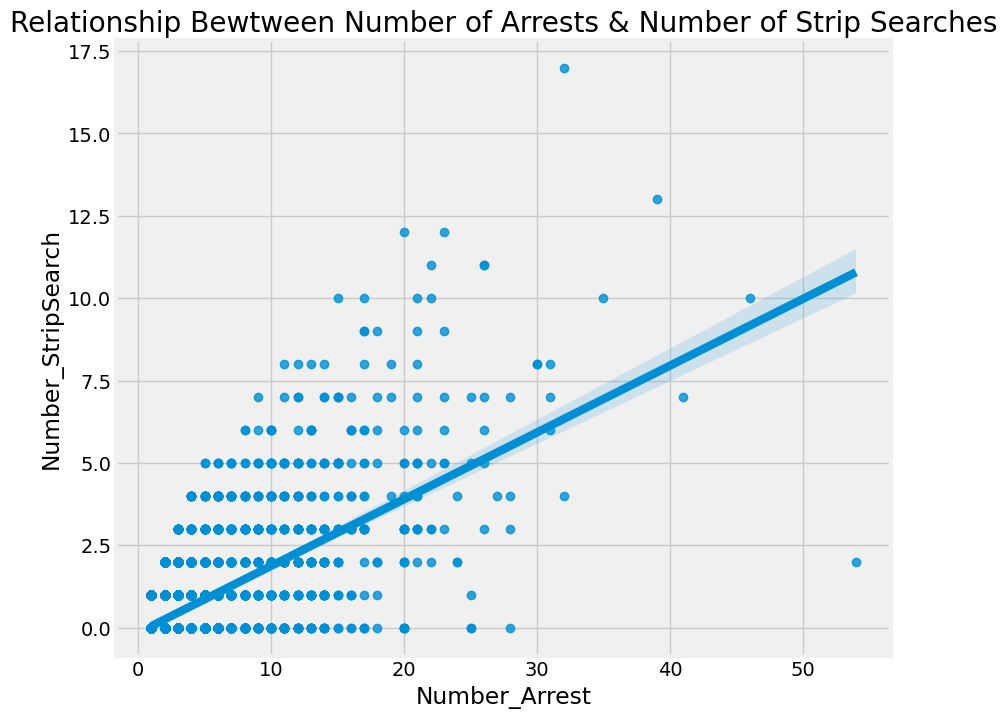

In [102]:
#fit ANCOVA Assuption
#the dependent variable is approximately normally distributed within each subpopulation
#https://www.aatbio.com/resources/faq-frequently-asked-questions/what-are-the-assumptions-of-ancova
plt.figure(figsize=(10, 8))
plt.style.use('fivethirtyeight')
plt.title("Relationship Bewtween Number of Arrests & Number of Strip Searches")
sns.regplot(x="Number_Arrest", y="Number_StripSearch", data=df1)
plt.show()

###**ANCOVA TEST**


In [103]:
!pip install pingouin
import numpy as np
import pandas as pd
from pingouin import ancova
import statsmodels.formula.api as smf
import statsmodels.api as sm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 198.6/198.6 kB 7.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for littleutils: filename=littleutils-0.2.2-py3-none-any.whl size=7048 sha256=14809c856537a07b15df49d89c56e0a1377b2368ac5d8b0f0faab6cc0983d487
  Stored in directory: /root/.cache/pip/wheels/04/bb/0d/2d02ec45f29c48d6192476bfb59c5a0e64b605e7212374dd15
Successfully built littleutils


### **Perceived Race**

In [104]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
#perfome the ANCOVA
model1 = ols(' Number_StripSearch ~ Perceived_Race + Number_Arrest', data=df1).fit()

In [105]:
# Print the result
ancova(data=df1,dv="Number_StripSearch",covar="Number_Arrest",between="Perceived_Race")

Source           SS     DF             F         p-unc       np2
0  Perceived_Race    21.514958      7     12.278243  8.762727e-16  0.002304
1   Number_Arrest  6044.292151      1  24145.666378  0.000000e+00  0.393459
2        Residual  9317.640644  37222           NaN           NaN       NaN

In [106]:
# Print the summary of the model
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:     Number_StripSearch   R-squared:                       0.399
Model:                            OLS   Adj. R-squared:                  0.399
Method:                 Least Squares   F-statistic:                     3095.
Date:                Sun, 16 Apr 2023   Prob (F-statistic):               0.00
Time:                        19:05:08   Log-Likelihood:                -27042.
No. Observations:               37231   AIC:                         5.410e+04
Df Residuals:                   37222   BIC:                         5.418e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                             coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------

### **Occurence Category**

In [107]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
#perfome the ANCOVA
model12 = ols(' Number_StripSearch ~ Occurrence_Category + Number_Arrest', data=df1).fit()

In [108]:
# Print the result
ancova(data=df1,dv="Number_StripSearch",covar="Number_Arrest",between="Occurrence_Category")

Source           SS     DF             F  p-unc       np2
0  Occurrence_Category   588.171356     29     86.216802    0.0  0.062979
1        Number_Arrest  5453.742413      1  23183.588502    0.0  0.383939
2             Residual  8750.984246  37200           NaN    NaN       NaN

In [109]:
# Print the summary of the model
print(model12.summary())

                            OLS Regression Results                            
Dep. Variable:     Number_StripSearch   R-squared:                       0.436
Model:                            OLS   Adj. R-squared:                  0.436
Method:                 Least Squares   F-statistic:                     958.5
Date:                Sun, 16 Apr 2023   Prob (F-statistic):               0.00
Time:                        19:05:09   Log-Likelihood:                -25874.
No. Observations:               37231   AIC:                         5.181e+04
Df Residuals:                   37200   BIC:                         5.207e+04
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
                                                                             coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------

# **Chi-square Test**

In [110]:
from scipy.stats import chi2_contingency
# create a contingency table
table = pd.crosstab(ASdata['Perceived_Race'],ASdata['StripSearch'])
print("observed frequencies: \n", table, '\n')

# perform chi-squared independence test
chi2, p, dof, expected = chi2_contingency(table)

# print results
print("Chi-squared statistic:", chi2)
print("p-value:", p)
print("Degrees of freedom:", dof)
print("Expected frequencies:\n", expected)

observed frequencies: 
 StripSearch               0     1
Perceived_Race                   
Black                 15053  2299
East/Southeast Asian   4061   327
Indigenous             1620   287
Latino                 1626   125
Middle-Eastern         2999   214
South Asian            3346   248
Unknown or Legacy      4506   493
White                 24064  3338 

Chi-squared statistic: 356.12485254652904
p-value: 6.017709683374717e-73
Degrees of freedom: 7
Expected frequencies:
 [[15383.0263443   1968.9736557 ]
 [ 3890.08296443   497.91703557]
 [ 1690.60807046   216.39192954]
 [ 1552.30976999   198.69023001]
 [ 2848.41307309   364.58692691]
 [ 3186.18007615   407.81992385]
 [ 4431.75130793   567.24869207]
 [24292.62839365  3109.37160635]]


In [111]:
table = pd.crosstab(ASdata['Perceived_Race'],ASdata['Occurrence_Category'])
print("observed frequencies: \n", table, '\n')

# perform chi-squared independence test
chi2, p, dof, expected = chi2_contingency(table)

# print results
print("Chi-squared statistic:", chi2)
print("p-value:", p)
print("Degrees of freedom:", dof)
print("Expected frequencies:\n", expected)

observed frequencies: 
 Occurrence_Category   Assault  Assault & Other crimes against persons  \
Perceived_Race                                                          
Black                    2127                                    1962   
East/Southeast Asian      648                                     595   
Indigenous                186                                     220   
Latino                    284                                     235   
Middle-Eastern            475                                     378   
South Asian               490                                     452   
Unknown or Legacy         598                                     578   
White                    2916                                    2758   

Occurrence_Category   Break & Enter  Crimes against Children  Drug Related  \
Perceived_Race                                                               
Black                           280                        9           942   
East/Southe

In [112]:
table = pd.crosstab(ASdata['StripSearch'],ASdata['Occurrence_Category'])
print("observed frequencies: \n", table, '\n')

# perform chi-squared independence test
chi2, p, dof, expected = chi2_contingency(table)

# print results
print("Chi-squared statistic:", chi2)
print("p-value:", p)
print("Degrees of freedom:", dof)
print("Expected frequencies:\n", expected)

observed frequencies: 
 Occurrence_Category  Assault  Assault & Other crimes against persons  \
StripSearch                                                            
0                       7620                                    5807   
1                        104                                    1371   

Occurrence_Category  Break & Enter  Crimes against Children  Drug Related  \
StripSearch                                                                 
0                             1323                       69          1674   
1                              392                        0          1059   

Occurrence_Category  FTA/FTC, Compliance Check & Parollee  \
StripSearch                                                 
0                                                    2636   
1                                                    1112   

Occurrence_Category  FTA/FTC/Compliance Check/Parollee  Fraud  \
StripSearch                                                     
0  

# **Logistic Regression**

### **Logit Regression: DV - StripSearch; IV:Sex, Perceived_Race, Occurrence_Category_Drug_Related, Weapons & Homicide, Break & Enter**

In [113]:
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import numpy as np
pd.options.display.max_columns = None #show all columns in data

In [114]:
#Change StripSearch binary data to "Yes" and "No"
data = ASdata['StripSearch']
df_strip = pd.DataFrame(data)
df_strip = df_strip.replace(1, "yes")
df_strip = df_strip.replace(0, "no")
ASdata['StripSearch_yesno'] = df_strip
print(df_strip)


      StripSearch
0              no
1              no
2              no
3              no
4              no
...           ...
65271          no
65272          no
65273          no
65274          no
65275          no

[64606 rows x 1 columns]


In [115]:
#Change Sex binary data to 0 and 1
data = ASdata['Sex']
df_sex = pd.DataFrame(data)
df_sex = df_sex.replace('M', 0)
df_sex = df_sex.replace('F', 1)
print(df_sex)

       Sex
0        0
1        0
2        0
3        0
4        0
...    ...
65271    1
65272    0
65273    1
65274    0
65275    0

[64606 rows x 1 columns]


In [116]:
#Select features of interest
x_selected = ASdata[['StripSearch',  'Perceived_Race', 'Occurrence_Category', 'Sex']].copy()

# Select the response column 
y = pd.get_dummies(ASdata.StripSearch_yesno, drop_first=True)  
print(y)

       yes
0        0
1        0
2        0
3        0
4        0
...    ...
65271    0
65272    0
65273    0
65274    0
65275    0

[64606 rows x 1 columns]


In [117]:
# # Change x independent variable - Age_group__at_arrest_ into dummies
# # Example data
# data = ASdata['Age_group__at_arrest_']
# df_age = pd.DataFrame(data)

# # Create dummies
# dummies = pd.get_dummies(df_age['Age_group__at_arrest_'], prefix='Age_group__at_arrest_')

# # Concatenate the original DataFrame and the dummies
# df_age = pd.concat([df_age, dummies], axis=1)

# # Drop the original column
# df_age.drop(['Age_group__at_arrest_'], axis=1, inplace=True)

# # Result
# # print(df_age)

In [118]:
# Change x independent variable - Perceived_Race into dummies
# Example data
data = ASdata['Perceived_Race']
df_race_bi = pd.DataFrame(data)

# Create dummies
dummies = pd.get_dummies(df_race_bi['Perceived_Race'], prefix='Perceived_Race')

# Concatenate the original DataFrame and the dummies
df_race_bi = pd.concat([df_race_bi, dummies], axis=1)

# Drop the original column
df_race_bi.drop(['Perceived_Race'], axis=1, inplace=True)

# Result
# print(df_race_bi)

In [119]:
# Change x independent variable - Age_group__at_arrest_ into dummies
# Example data
data = ASdata['Occurrence_Category']
df_occurrence = pd.DataFrame(data)

# Create dummies
dummies = pd.get_dummies(df_occurrence['Occurrence_Category'], prefix='Occurrence_Category')

# Concatenate the original DataFrame and the dummies
df_occurrence = pd.concat([df_occurrence, dummies], axis=1)

# Drop the original column
df_occurrence.drop(['Occurrence_Category'], axis=1, inplace=True)

# Result
# print(df_occurrence)


In [120]:
# Combine all independent dummy variables together
x_selected = pd.concat([df_sex, df_race_bi, df_occurrence], axis=1, join='inner')
display(x_selected)

Sex  Perceived_Race_Black  Perceived_Race_East/Southeast Asian  \
0        0                     0                                    0   
1        0                     0                                    0   
2        0                     0                                    0   
3        0                     1                                    0   
4        0                     0                                    0   
...    ...                   ...                                  ...   
65271    1                     0                                    0   
65272    0                     0                                    0   
65273    1                     0                                    0   
65274    0                     0                                    0   
65275    0                     0                                    0   

       Perceived_Race_Indigenous  Perceived_Race_Latino  \
0                              0                      0   
1                              0                      0   
2                              0                      0   
3                              0                      0   
4                              0                      0   
...                          ...                    ...   
65271                          1                      0   
65272                          0                      0   
65273                          0                      0   
65274                          0                      0   
65275                          0                      1   

       Perceived_Race_Middle-Eastern  Perceived_Race_South Asian  \
0                                  0                           0   
1                                  0                           0   
2                                  0                           0   
3                                  0                           0   
4                                  0                           1   
...                              ...                         ...   
65271                              0                           0   
65272                              0                           1   
65273                              0                           0   
65274                              0                           0   
65275                              0                           0   

       Perceived_Race_Unknown or Legacy  Perceived_Race_White  \
0                                     0                     1   
1                                     0                     1   
2                                     1                     0   
3                                     0                     0   
4                                     0                     0   
...                                 ...                   ...   
65271                                 0                     0   
65272                                 0                     0   
65273                                 0                     1   
65274                                 1                     0   
65275                                 0                     0   

       Occurrence_Category_Assault  \
0                                0   
1                                0   
2                                0   
3                                0   
4                                0   
...                            ...   
65271                            0   
65272                            1   
65273                            1   
65274                            0   
65275                            0   

       Occurrence_Category_Assault & Other crimes against persons  \
0                                                      1            
1                                                      1            
2                                                      1            
3                                                      0            
4                    

In [121]:
len(x_selected.columns)

39

In [122]:
# Select required independent variables to make a new x and normalize their names
# x_selected = x_selected.rename(columns={'Age_group__at_arrest__Aged 17 years and younger': 'Age_group__at_arrest__Aged_17_years_and_younger'})
# x_selected = x_selected.rename(columns={'Age_group__at_arrest__Aged 18 to 24 years': 'Age_group__at_arrest__Aged_18_to_24_years', 'Age_group__at_arrest__Aged 25 to 34 years': 'Age_group__at_arrest__Aged_25_to_34_years' ,'Age_group__at_arrest__Aged 35 to 44 years': 'Age_group__at_arrest__Aged_35_to_44_years', 'Age_group__at_arrest__Aged 45 to 54 years': 'Age_group__at_arrest__Aged_45_to_54_years', 'Age_group__at_arrest__Aged 55 to 64 years': 'Age_group__at_arrest__Aged_55_to_64_years', 'Age_group__at_arrest__Aged 65 years and older': 'Age_group__at_arrest__Aged_65_years_and_older'})
x_selected = x_selected.rename(columns={'Perceived_Race_East/Southeast Asian': 'Perceived_Race_East_Southeast_Asian', 'Perceived_Race_Middle-Eastern': 'Perceived_Race_Middle_Eastern', 'Perceived_Race_South Asian': 'Perceived_Race_South_Asian'})
x_selected = x_selected.rename(columns={'Occurrence_Category_Drug Related': 'Occurrence_Category_Drug_Related'})
x_selected = x_selected.rename(columns={'Occurrence_Category_Weapons & Homicide': 'Occurrence_Category_Weapons_Homicide'})
x_selected = x_selected.rename(columns={'Occurrence_Category_Break & Enter': 'Occurrence_Category_Break_Enter'})
x_selected = x_selected.rename(columns={'Sex': 'Sex'})
x_selected.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 64606 entries, 0 to 65275
Data columns (total 39 columns):
 #   Column                                                               Non-Null Count  Dtype
---  ------                                                               --------------  -----
 0   Sex                                                                  64606 non-null  int64
 1   Perceived_Race_Black                                                 64606 non-null  uint8
 2   Perceived_Race_East_Southeast_Asian                                  64606 non-null  uint8
 3   Perceived_Race_Indigenous                                            64606 non-null  uint8
 4   Perceived_Race_Latino                                                64606 non-null  uint8
 5   Perceived_Race_Middle_Eastern                                        64606 non-null  uint8
 6   Perceived_Race_South_Asian                                           64606 non-null  uint8
 7   Perceived_Race_Unknown

In [123]:
# Combine selected independent dummies into a new x
x = x_selected[['Sex', 'Perceived_Race_Black', 'Perceived_Race_East_Southeast_Asian', 'Perceived_Race_Indigenous', 'Perceived_Race_Latino', 'Perceived_Race_Middle_Eastern', 'Perceived_Race_South_Asian', 'Perceived_Race_White', 'Occurrence_Category_Drug_Related', 'Occurrence_Category_Weapons_Homicide', 'Occurrence_Category_Break_Enter']]
x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 64606 entries, 0 to 65275
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype
---  ------                                --------------  -----
 0   Sex                                   64606 non-null  int64
 1   Perceived_Race_Black                  64606 non-null  uint8
 2   Perceived_Race_East_Southeast_Asian   64606 non-null  uint8
 3   Perceived_Race_Indigenous             64606 non-null  uint8
 4   Perceived_Race_Latino                 64606 non-null  uint8
 5   Perceived_Race_Middle_Eastern         64606 non-null  uint8
 6   Perceived_Race_South_Asian            64606 non-null  uint8
 7   Perceived_Race_White                  64606 non-null  uint8
 8   Occurrence_Category_Drug_Related      64606 non-null  uint8
 9   Occurrence_Category_Weapons_Homicide  64606 non-null  uint8
 10  Occurrence_Category_Break_Enter       64606 non-null  uint8
dtypes: int64(1), uint8(10)
memory usage: 3.6 

In [124]:
y['yes'].unique()

array([0, 1], dtype=uint8)

### **Check Assumptions**

In [125]:
# Equal variance
# group the data by gender, age, and race and calculate the variance of each group
grouped_var = ASdata.groupby(['Sex', 'Perceived_Race', 'Occurrence_Category'])['StripSearch'].var()

# print the variance of each group
display(grouped_var)

Sex  Perceived_Race  Occurrence_Category                   
F    Black           Assault                                   0.008829
                     Assault & Other crimes against persons    0.103840
                     Break & Enter                             0.153409
                     Crimes against Children                   0.000000
                     Drug Related                              0.192661
                                                                 ...   
M    White           Vehicle Related                           0.000000
                     Vehicle Related (inc. Impaired)           0.054431
                     Warrant                                   0.160997
                     Weapons                                   0.066837
                     Weapons & Homicide                        0.233934
Name: StripSearch, Length: 466, dtype: float64

In [126]:
# No multicollinearity 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create correlation matrix
corr_matrix = x.corr()

# Print correlation matrix
print(corr_matrix)

                                           Sex  Perceived_Race_Black  \
Sex                                   1.000000             -0.032381   
Perceived_Race_Black                 -0.032381              1.000000   
Perceived_Race_East_Southeast_Asian  -0.016818             -0.163578   
Perceived_Race_Indigenous             0.058579             -0.105682   
Perceived_Race_Latino                -0.018046             -0.101141   
Perceived_Race_Middle_Eastern        -0.046440             -0.138628   
Perceived_Race_South_Asian           -0.032031             -0.147074   
Perceived_Race_White                  0.062734             -0.520058   
Occurrence_Category_Drug_Related     -0.007355              0.036083   
Occurrence_Category_Weapons_Homicide -0.021834              0.054710   
Occurrence_Category_Break_Enter      -0.022137             -0.039239   

                                      Perceived_Race_East_Southeast_Asian  \
Sex                                                       

In [127]:
# Calculate VIF
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif["features"] = x.columns

# Print VIF
print(vif)

    VIF Factor                              features
0     1.232637                                   Sex
1     1.089168                  Perceived_Race_Black
2     1.018041   Perceived_Race_East_Southeast_Asian
3     1.022814             Perceived_Race_Indigenous
4     1.005035                 Perceived_Race_Latino
5     1.006573         Perceived_Race_Middle_Eastern
6     1.009170            Perceived_Race_South_Asian
7     1.183733                  Perceived_Race_White
8     1.044268      Occurrence_Category_Drug_Related
9     1.020414  Occurrence_Category_Weapons_Homicide
10    1.033149       Occurrence_Category_Break_Enter


In [128]:
# Combine selected independent dummies into a new x
x = x_selected[['Sex', 'Perceived_Race_Black', 'Perceived_Race_East_Southeast_Asian', 'Perceived_Race_Indigenous', 'Perceived_Race_Latino', 'Perceived_Race_Middle_Eastern', 'Perceived_Race_South_Asian', 'Perceived_Race_White', 'Occurrence_Category_Drug_Related', 'Occurrence_Category_Weapons_Homicide', 'Occurrence_Category_Break_Enter']]
x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 64606 entries, 0 to 65275
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype
---  ------                                --------------  -----
 0   Sex                                   64606 non-null  int64
 1   Perceived_Race_Black                  64606 non-null  uint8
 2   Perceived_Race_East_Southeast_Asian   64606 non-null  uint8
 3   Perceived_Race_Indigenous             64606 non-null  uint8
 4   Perceived_Race_Latino                 64606 non-null  uint8
 5   Perceived_Race_Middle_Eastern         64606 non-null  uint8
 6   Perceived_Race_South_Asian            64606 non-null  uint8
 7   Perceived_Race_White                  64606 non-null  uint8
 8   Occurrence_Category_Drug_Related      64606 non-null  uint8
 9   Occurrence_Category_Weapons_Homicide  64606 non-null  uint8
 10  Occurrence_Category_Break_Enter       64606 non-null  uint8
dtypes: int64(1), uint8(10)
memory usage: 3.6 

In [129]:
# large sample size
data_crosstab = pd.crosstab([ASdata['Sex'],ASdata['Perceived_Race'],ASdata['Occurrence_Category']],
                            ASdata['StripSearch'],normalize = False,
                            margins = False)
print(data_crosstab)

StripSearch                                                   0    1
Sex Perceived_Race Occurrence_Category                              
F   Black          Assault                                  446    4
                   Assault & Other crimes against persons   361   48
                   Break & Enter                             27    6
                   Crimes against Children                    3    0
                   Drug Related                              81   28
...                                                         ...  ...
M   White          Vehicle Related                          200    0
                   Vehicle Related (inc. Impaired)          523   32
                   Warrant                                 1280  323
                   Weapons                                  233   18
                   Weapons & Homicide                       167   98

[466 rows x 2 columns]


### **Build the Model**

In [130]:
# Split these data into training and testing datasets
#set random seed for replicability 
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3, random_state = 42)

In [131]:
# checking the shapes and descriptive statistics of the training and test data for the model.
print(f"x_train shape: {x_train.shape}")
print(f"y_train shape: {y_train.shape}")
print("\n========== Training data ==========")
display(y_train.describe().T)
print(f"x_test shape: {x_test.shape}")
print(f"y_test shape: {y_test.shape}")
print("\n========== Test data ==========")
display(y_test.describe().T)

x_train shape: (45224, 11)
y_train shape: (45224, 1)

========== Training data ==========


count     mean       std  min  25%  50%  75%  max
yes  45224.0  0.11286  0.316426  0.0  0.0  0.0  0.0  1.0

x_test shape: (19382, 11)
y_test shape: (19382, 1)

========== Test data ==========


count    mean      std  min  25%  50%  75%  max
yes  19382.0  0.1149  0.31891  0.0  0.0  0.0  0.0  1.0

In [132]:
y_train

yes
49305    0
15121    1
4868     0
50960    0
60100    0
...    ...
63207    0
38571    0
867      0
15975    0
57017    0

[45224 rows x 1 columns]

In [133]:
#building the model with statsmodels
import statsmodels.formula.api as smf

# Create the formula string 
all_columns = ' + '.join(x)
formula = "yes ~ " + all_columns 
print("Formula: ", formula, "\n")

# Put the training predictors and responses into one DataFrame to be input into the model
trainingdata = pd.concat([x_train,y_train], axis = 1)

# Build the model
log_reg_1 = smf.logit(formula, data=trainingdata).fit()

Formula:  yes ~ Sex + Perceived_Race_Black + Perceived_Race_East_Southeast_Asian + Perceived_Race_Indigenous + Perceived_Race_Latino + Perceived_Race_Middle_Eastern + Perceived_Race_South_Asian + Perceived_Race_White + Occurrence_Category_Drug_Related + Occurrence_Category_Weapons_Homicide + Occurrence_Category_Break_Enter 

Optimization terminated successfully.
         Current function value: 0.329984
         Iterations 7


In [134]:
# Get model information and results
reg = smf.logit('yes ~ Sex + Perceived_Race_Black + Perceived_Race_East_Southeast_Asian + Perceived_Race_Indigenous + Perceived_Race_Latino + Perceived_Race_Middle_Eastern + Perceived_Race_South_Asian + Perceived_Race_White + Occurrence_Category_Drug_Related + Occurrence_Category_Weapons_Homicide + Occurrence_Category_Break_Enter', data=trainingdata).fit()
reg.summary()

Optimization terminated successfully.
         Current function value: 0.329984
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    yes   No. Observations:                45224
Model:                          Logit   Df Residuals:                    45212
Method:                           MLE   Df Model:                           11
Date:                Sun, 16 Apr 2023   Pseudo R-squ.:                 0.06375
Time:                        19:05:20   Log-Likelihood:                -14923.
converged:                       True   LL-Null:                       -15939.
Covariance Type:            nonrobust   LLR p-value:                     0.000
========================================================================================================
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
Intercept                               -2.4821      0.061    -40.796      0.000      -2.601      -2.363
Sex                                     -0.2031      0.041     -4.967      0.000      -0.283      -0.123
Perceived_Race_Black                     0.3486      0.066      5.276      0.000       0.219       0.478
Perceived_Race_East_Southeast_Asian     -0.3106      0.093     -3.324      0.001      -0.494      -0.127
Perceived_Race_Indigenous                0.6777      0.098      6.906      0.000       0.485       0.870
Perceived_Race_Latino                   -0.1328      0.124     -1.072      0.284      -0.376       0.110
Perceived_Race_Middle_Eastern           -0.3421      0.106     -3.238      0.001      -0.549      -0.135
Perceived_Race_South_Asian              -0.2703      0.099     -2.720      0.007      -0.465      -0.076
Perceived_Race_White                     0.3271      0.064      5.094      0.000       0.201       0.453
Occurrence_Category_Drug_Related         1.8488      0.051     36.463      0.000       1.749       1.948
Occurrence_Category_Weapons_Homicide     1.9447      0.076     25.494      0.000       1.795       2.094
Occurrence_Category_Break_Enter          1.0791      0.071     15.211      0.000       0.940       1.218
========================================================================================================
"""

In [135]:
#getting odds ratio 
np.exp(reg.params)

Intercept                               0.083568
Sex                                     0.816174
Perceived_Race_Black                    1.417045
Perceived_Race_East_Southeast_Asian     0.732984
Perceived_Race_Indigenous               1.969350
Perceived_Race_Latino                   0.875636
Perceived_Race_Middle_Eastern           0.710265
Perceived_Race_South_Asian              0.763185
Perceived_Race_White                    1.386888
Occurrence_Category_Drug_Related        6.352061
Occurrence_Category_Weapons_Homicide    6.991492
Occurrence_Category_Break_Enter         2.942077
dtype: float64

In [136]:
# Calculates odds ratios (ORs) and confidence intervals (CIs) for a logistic regression model
params = reg.params
conf = reg.conf_int()
conf['OR'] = params
conf.columns = ["Lower CI", "Upper CI", "OR"]
np.exp(conf)

Lower CI  Upper CI        OR
Intercept                             0.074174  0.094152  0.083568
Sex                                   0.753310  0.884282  0.816174
Perceived_Race_Black                  1.244922  1.612967  1.417045
Perceived_Race_East_Southeast_Asian   0.610314  0.880311  0.732984
Perceived_Race_Indigenous             1.624776  2.386999  1.969350
Perceived_Race_Latino                 0.686869  1.116279  0.875636
Perceived_Race_Middle_Eastern         0.577399  0.873705  0.710265
Perceived_Race_South_Asian            0.628150  0.927249  0.763185
Perceived_Race_White                  1.222907  1.572858  1.386888
Occurrence_Category_Drug_Related      5.751173  7.015730  6.352061
Occurrence_Category_Weapons_Homicide  6.020606  8.118943  6.991492
Occurrence_Category_Break_Enter       2.560155  3.380975  2.942077

### **Evaluate the model performence**

In [137]:
#Assess the model
from sklearn.metrics import confusion_matrix, accuracy_score
# Predict responses 
pred = log_reg_1.predict(x_test)
# round() rounds to nearest integer;
# 0.5 rounds to 0; 0.501 rounds to 1
prediction = list(map(round, pred))

In [138]:
# Accuracy score
print('\nTest accuracy = ', accuracy_score(y_test, prediction))


Test accuracy =  0.8852543597151997


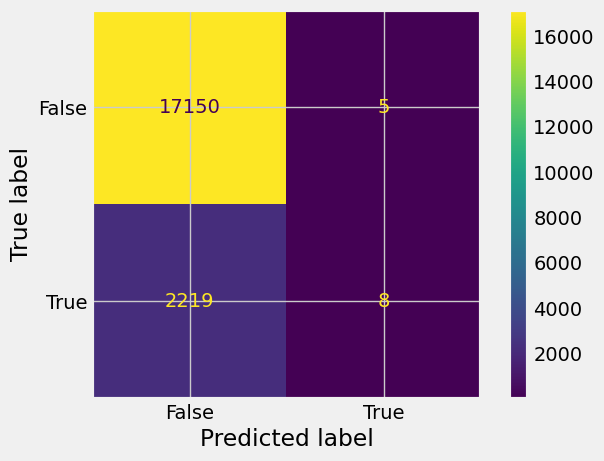

In [139]:
# Plotting Confusion Matrix
# Reference: https://www.w3schools.com/python/python_ml_confusion_matrix.asp
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics

actual = numpy.random.binomial(1,.9,size = 1000)
predicted = numpy.random.binomial(1,.9,size = 1000)

confusion_matrix = metrics.confusion_matrix(y_test, prediction)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

In [140]:
# Interpret Confusion Matrix
# True Negative (TN)(Top-Left Quadrant): 17150 instances were incorrectly classified as negative (class 0)
# False Positive (FP)(Top-Right Quadrant): 5 instances were correctly classified as negative (class 0)
# False Negative (FN)(Bottom-Left Quadrant): 2219 instances were incorrectly classified as positive (class 1)
# True Positive (TP)(Bottom-Right Quadrant): 8 instances were correctly classified as positive (class 1)

# True Positives (TP): 8 instances who were strip searched were correctly classified as being strip searched.
# False Positives (FP): 5 instances who were not strip searched were incorrectly classified as being stripsearched.
# True Negatives (TN): 17150 instances who were strip searched were incorrectly classified as not being strip searched.
# False Negatives (FN): 2219 instances who were not strip searched were correctly classified as not being strip searched.

# Using these values, we can calculate the performance metrics:
# Accuracy: (17150 + 8) / (5 + 8 + 2219 + 17150) = 0.88
# Precision: 8 / (8 + 5) = 0.62
# Recall (Sensitivity or True Positive Rate): 8 / (8 + 2219) = 0.0035
# F1 Score: 2 * (0.62 * 0.0035) / (0.62 + 0.0035) = 0.0069
# From this example, we can see that the model has an accuracy of 88%, which means that 88% of the instances in the test set were correctly classified by the model. The precision of 0.62 indicates that the model is not making many false positive predictions, while the recall of 0.0035 indicates that the model is not capturing most of the positive instances. The F1 Score of 0.0035 is the harmonic mean of precision and recall and provides a balance between the two metrics.

### **Reconduct the race variable to make another logit regression model**

In [141]:
# Change x independent variable - Perceived race into multi levels with different numbers.
data = ASdata['Perceived_Race']
df_race = pd.DataFrame(data)

df_race = df_race.replace('Black', 0)
df_race = df_race.replace('East/Southeast Asian', 1)
df_race = df_race.replace('Indigenous', 2)
df_race = df_race.replace('Latino', 3)
df_race = df_race.replace('Middle-Eastern', 4)
df_race = df_race.replace('South Asian', 5)
df_race = df_race.replace('White', 6)
df_race = df_race.replace('Unknown or Legacy', 7)
print(df_race)


       Perceived_Race
0                   6
1                   6
2                   7
3                   0
4                   5
...               ...
65271               2
65272               5
65273               6
65274               7
65275               3

[64606 rows x 1 columns]


In [142]:
# Combine all new independent variables together
x_selected_new = pd.concat([df_sex, df_race, df_occurrence], axis=1, join='inner')
display(x_selected_new)

Sex  Perceived_Race  Occurrence_Category_Assault  \
0        0               6                            0   
1        0               6                            0   
2        0               7                            0   
3        0               0                            0   
4        0               5                            0   
...    ...             ...                          ...   
65271    1               2                            0   
65272    0               5                            1   
65273    1               6                            1   
65274    0               7                            0   
65275    0               3                            0   

       Occurrence_Category_Assault & Other crimes against persons  \
0                                                      1            
1                                                      1            
2                                                      1            
3                                                      0            
4                                                      0            
...                                                  ...            
65271                                                  0            
65272                                                  0            
65273                                                  0            
65274                                                  0            
65275                                                  0            

       Occurrence_Category_Break & Enter  \
0                                      0   
1                                      0   
2                                      0   
3                                      0   
4                                      0   
...                                  ...   
65271                                  0   
65272                                  0   
65273                                  0   
65274                                  0   
65275                                  0   

       Occurrence_Category_Crimes against Children  \
0                                                0   
1                                                0   
2                                                0   
3                                                0   
4                                                0   
...                                            ...   
65271                                            0   
65272                                            0   
65273                                            0   
65274                                            0   
65275                                            0   

       Occurrence_Category_Drug Related  \
0                                     0   
1                                     0   
2                                     0   
3                                     0   
4                                     0   
...                                 ...   
65271                                 0   
65272                                 0   
65273                                 0   
65274                                 0   
65275                                 0   

       Occurrence_Category_FTA/FTC, Compliance Check & Parollee  \
0                                                      0          
1                                                      0          
2                                                      0          
3                                                      0          
4                                                      0          
...                                                  ...          
65271                                                  0          
65272                                                  0          
65273                                                  0          
65274                                                  0          
65275                                

In [143]:
# Select required independent variables to make a new x and normalize their names
x_selected_new = x_selected_new.rename(columns={'Occurrence_Category_Drug Related': 'Occurrence_Category_Drug_Related'})
x_selected_new = x_selected_new.rename(columns={'Occurrence_Category_Weapons & Homicide': 'Occurrence_Category_Weapons_Homicide'})
x_selected_new = x_selected_new.rename(columns={'Occurrence_Category_Break & Enter': 'Occurrence_Category_Break_Enter'})
x_selected_new = x_selected_new.rename(columns={'Sex': 'Sex'})
x_selected_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 64606 entries, 0 to 65275
Data columns (total 32 columns):
 #   Column                                                               Non-Null Count  Dtype
---  ------                                                               --------------  -----
 0   Sex                                                                  64606 non-null  int64
 1   Perceived_Race                                                       64606 non-null  int64
 2   Occurrence_Category_Assault                                          64606 non-null  uint8
 3   Occurrence_Category_Assault & Other crimes against persons           64606 non-null  uint8
 4   Occurrence_Category_Break_Enter                                      64606 non-null  uint8
 5   Occurrence_Category_Crimes against Children                          64606 non-null  uint8
 6   Occurrence_Category_Drug_Related                                     64606 non-null  uint8
 7   Occurrence_Category_FT

In [144]:
# Reselect independent variable into a new x for another logit regression model
x = x_selected_new[['Sex', 'Perceived_Race', 'Occurrence_Category_Drug_Related', 'Occurrence_Category_Weapons_Homicide', 'Occurrence_Category_Break_Enter']]
x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 64606 entries, 0 to 65275
Data columns (total 5 columns):
 #   Column                                Non-Null Count  Dtype
---  ------                                --------------  -----
 0   Sex                                   64606 non-null  int64
 1   Perceived_Race                        64606 non-null  int64
 2   Occurrence_Category_Drug_Related      64606 non-null  uint8
 3   Occurrence_Category_Weapons_Homicide  64606 non-null  uint8
 4   Occurrence_Category_Break_Enter       64606 non-null  uint8
dtypes: int64(2), uint8(3)
memory usage: 3.7 MB


In [145]:
# Split these data into training and testing datasets
#set random seed for replicability 
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3, random_state = 42)

In [146]:
# checking the shapes and descriptive statistics of the training and test data for the model.
print(f"x_train shape: {x_train.shape}")
print(f"y_train shape: {y_train.shape}")
print("\n========== Training data ==========")
display(y_train.describe().T)
print(f"x_test shape: {x_test.shape}")
print(f"y_test shape: {y_test.shape}")
print("\n========== Test data ==========")
display(y_test.describe().T)

x_train shape: (45224, 5)
y_train shape: (45224, 1)

========== Training data ==========


count     mean       std  min  25%  50%  75%  max
yes  45224.0  0.11286  0.316426  0.0  0.0  0.0  0.0  1.0

x_test shape: (19382, 5)
y_test shape: (19382, 1)

========== Test data ==========


count    mean      std  min  25%  50%  75%  max
yes  19382.0  0.1149  0.31891  0.0  0.0  0.0  0.0  1.0

In [147]:
y_train

yes
49305    0
15121    1
4868     0
50960    0
60100    0
...    ...
63207    0
38571    0
867      0
15975    0
57017    0

[45224 rows x 1 columns]

In [148]:
#building the model with statsmodels
import statsmodels.formula.api as smf

# Create the formula string 
all_columns = ' + '.join(x)
formula = "yes ~ " + all_columns 
print("Formula: ", formula, "\n")

# Put the training predictors and responses into one DataFrame to be input into the model
trainingdata = pd.concat([x_train,y_train], axis = 1)

# Build the model
log_reg_2 = smf.logit(formula, data=trainingdata).fit()

Formula:  yes ~ Sex + Perceived_Race + Occurrence_Category_Drug_Related + Occurrence_Category_Weapons_Homicide + Occurrence_Category_Break_Enter 

Optimization terminated successfully.
         Current function value: 0.332766
         Iterations 6


In [149]:
# Get model information and results
reg_2 = smf.logit('yes ~ Sex + Perceived_Race + Occurrence_Category_Drug_Related + Occurrence_Category_Weapons_Homicide + Occurrence_Category_Break_Enter', data=trainingdata).fit()
print(reg_2.summary())

Optimization terminated successfully.
         Current function value: 0.332766
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                    yes   No. Observations:                45224
Model:                          Logit   Df Residuals:                    45218
Method:                           MLE   Df Model:                            5
Date:                Sun, 16 Apr 2023   Pseudo R-squ.:                 0.05586
Time:                        19:05:23   Log-Likelihood:                -15049.
converged:                       True   LL-Null:                       -15939.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
Intercept                               -2.2407      0.0

In [150]:
#getting odds ratio 
np.exp(reg_2.params)

Intercept                               0.106385
Sex                                     0.859228
Perceived_Race                          0.991801
Occurrence_Category_Drug_Related        6.324862
Occurrence_Category_Weapons_Homicide    6.967448
Occurrence_Category_Break_Enter         3.111136
dtype: float64

In [151]:
# Calculates odds ratios (ORs) and confidence intervals (CIs) for a logistic regression model
params = reg_2.params
conf = reg_2.conf_int()
conf['OR'] = params
conf.columns = ["Lower CI", "Upper CI", "OR"]
np.exp(conf)

Lower CI  Upper CI        OR
Intercept                             0.100777  0.112304  0.106385
Sex                                   0.793538  0.930356  0.859228
Perceived_Race                        0.980993  1.002728  0.991801
Occurrence_Category_Drug_Related      5.730989  6.980274  6.324862
Occurrence_Category_Weapons_Homicide  6.007116  8.081303  6.967448
Occurrence_Category_Break_Enter       2.709434  3.572396  3.111136

In [152]:
#Assess the model
from sklearn.metrics import confusion_matrix, accuracy_score
# Predict responses 
pred = log_reg_2.predict(x_test)
# round() rounds to nearest integer;
# 0.5 rounds to 0; 0.501 rounds to 1
prediction = list(map(round, pred))

In [153]:
# Accuracy score
print('\nTest accuracy = ', accuracy_score(y_test, prediction))


Test accuracy =  0.8850995769270457


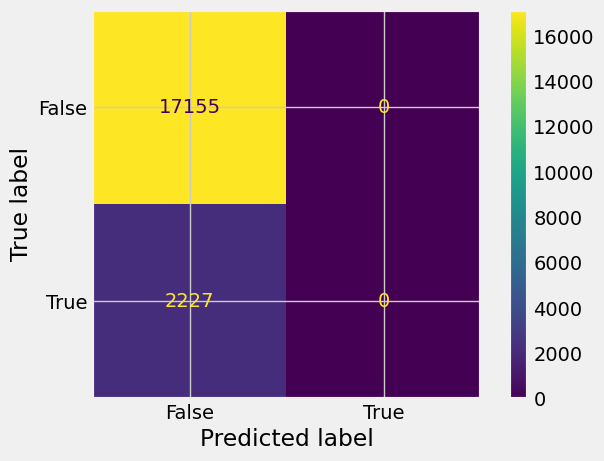

In [154]:
# Plotting Confusion Matrix
# Reference: https://www.w3schools.com/python/python_ml_confusion_matrix.asp
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics

actual = numpy.random.binomial(1,.9,size = 1000)
predicted = numpy.random.binomial(1,.9,size = 1000)

confusion_matrix = metrics.confusion_matrix(y_test, prediction)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

In [155]:
# Interpret Confusion Matrix
# True Negative (TN)(Top-Left Quadrant): 17155 instances were incorrectly classified as negative (class 0)
# False Positive (FP)(Top-Right Quadrant): 0 instances were correctly classified as negative (class 0)
# False Negative (FN)(Bottom-Left Quadrant): 2227 instances were incorrectly classified as positive (class 1)
# True Positive (TP)(Bottom-Right Quadrant): 0 instances were correctly classified as positive (class 1)

# True Positives (TP): 0 instances who were strip searched were correctly classified as being strip searched.
# False Positives (FP): 0 instances who were not strip searched were incorrectly classified as being stripsearched.
# True Negatives (TN): 17155 instances who were strip searched were incorrectly classified as not being strip searched.
# False Negatives (FN): 2227 instances who were not strip searched were correctly classified as not being strip searched.

### **Predict Interval**

In [156]:
# define some functions for calculating prediction interval
Λ = lambda x: stats.logistic().cdf(x)
λ = lambda x: stats.logistic().pdf(x)

In [157]:
# for multiple observations, but not quite vectorized fully
def var_πs(xx, β, V_):
    α = λ(xx.dot(β))**2
    out = np.empty((100, 1))
    for i, x in enumerate(xx):
        out[i] = x.T.dot(V_).dot(x)
    return α * out

In [158]:
log_reg_2.params

Intercept                              -2.240692
Sex                                    -0.151721
Perceived_Race                         -0.008233
Occurrence_Category_Drug_Related        1.844488
Occurrence_Category_Weapons_Homicide    1.941249
Occurrence_Category_Break_Enter         1.134988
dtype: float64

In [159]:
β_ = log_reg_2.params.values.reshape(-1, 1)
V_ = log_reg_2.cov_params().values

In [160]:
x.columns

Index(['Sex', 'Perceived_Race', 'Occurrence_Category_Drug_Related',
       'Occurrence_Category_Weapons_Homicide',
       'Occurrence_Category_Break_Enter'],
      dtype='object')

In [161]:
race = np.linspace(x.Perceived_Race.min(), x.Perceived_Race.max(), 100) 
xx = np.stack((np.full(100, 1), # constant
               race,             # Perceived_Race range from min to max
               np.full(100, 0), # sex - male
               np.full(100, 1), # drug
               np.full(100, 1), # weapons
               np.full(100, 1))) # break
xx = np.transpose(xx)

In [162]:
πs = Λ(xx.dot(β_))
vv = np.sqrt(var_πs(xx, β_, V_))

([<matplotlib.axis.XTick at 0x7f37e8e8d190>,
 [Text(0, 0, 'Black'),
  Text(1, 0, 'East/Southeast Asian'),
  Text(2, 0, 'Indigenous'),
  Text(4, 0, 'Latino'),
  Text(5, 0, 'Middle-Eastern'),
  Text(6, 0, 'South Asian'),
  Text(7, 0, 'White'),
  Text(8, 0, 'Unknown')])

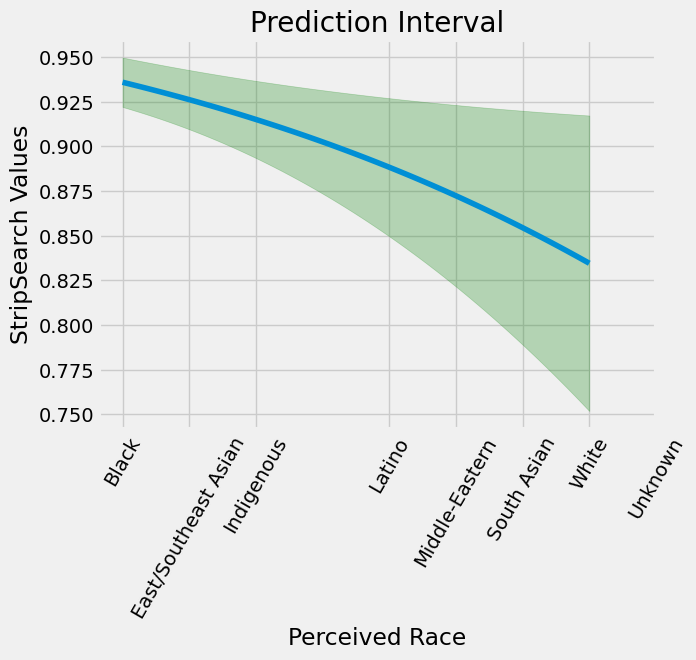

In [163]:
plt.plot(xx[:, 1], πs)
plt.fill_between(xx[:, 1], (πs - 1.96*vv).ravel(), (πs + 1.96*vv).ravel(),
                 alpha=.25, color='g')
plt.xlabel('Perceived Race')
plt.ylabel('StripSearch Values')
plt.title('Prediction Interval')
tick_labels = ['Black', 'East/Southeast Asian', 'Indigenous', 'Latino', 'Middle-Eastern', 'South Asian', 'White', 'Unknown']
tick_positions = [0, 1, 2, 4, 5, 6, 7, 8]
plt.xticks(tick_positions, tick_labels, rotation=60)